# Feed Forward with Neural Network
>**Dataset**: [Diabetes Datase - Kaggle](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)

### Import the necessary libraries

In [1]:
# for numerical computation/ array operation
import numpy as np
# for data manipulation
import pandas as pd
# for graph plotting 
import matplotlib.pyplot as plt
# for neural networks
import tensorflow as tf

### Load the data

In [2]:
df = pd.read_csv("data/diabetes.csv")

In [3]:
# Lets see the data
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# check the shape
df.shape

(768, 9)

In [5]:
# check the distribution of the labels
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [6]:
# check for null values
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
# check the columns type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
# lets check the statistics
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Insights ✅
1. **Pregnancies:** The average number of pregnancies is around **3.85**, but some individuals have had up to **17**. The spread is quite large, indicating variation in reproductive history.

2. **Glucose Levels:** The average glucose level is around **120.89**, but it ranges from **0** (possibly an error or missing data) to **199**. The **75th percentile** shows values above **140**, indicating many individuals with high blood sugar, which can be a risk factor for diabetes.

3. **Blood Pressure:** The mean **Blood Pressure** is **69**, but some individuals have reported **0**, which may indicate missing or incorrect data. The upper range goes up to **122**, and a significant number of individuals have pressure above **80**.

4. **Skin Thickness & Insulin:** The median **Skin Thickness** is **23**, and the **Insulin** level has a median of **30.5**, but the maximum insulin value is **846**, suggesting extreme outliers or errors in data entry.

5. **BMI (Body Mass Index):** The average BMI is around **31.99**, indicating that many individuals fall within overweight or obese categories. A **BMI above 30** is typically associated with higher risk of metabolic diseases, including diabetes.

6. **Diabetes Pedigree Function:** The average pedigree function is **0.47**, which measures hereditary risk for diabetes. The maximum value of **2.42** indicates some individuals might have a strong genetic predisposition.

7. **Age Distribution:** The average age is **33**, but individuals range from **21 to 81**, showing a wide distribution of ages in the dataset.

8. **Diabetes Outcome:** The outcome variable indicates that about **35%** of individuals have diabetes (mean **0.34**). This suggests a significant prevalence within the dataset.


### Visualize the data

In [9]:
# view the columns
columns = df.columns
columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

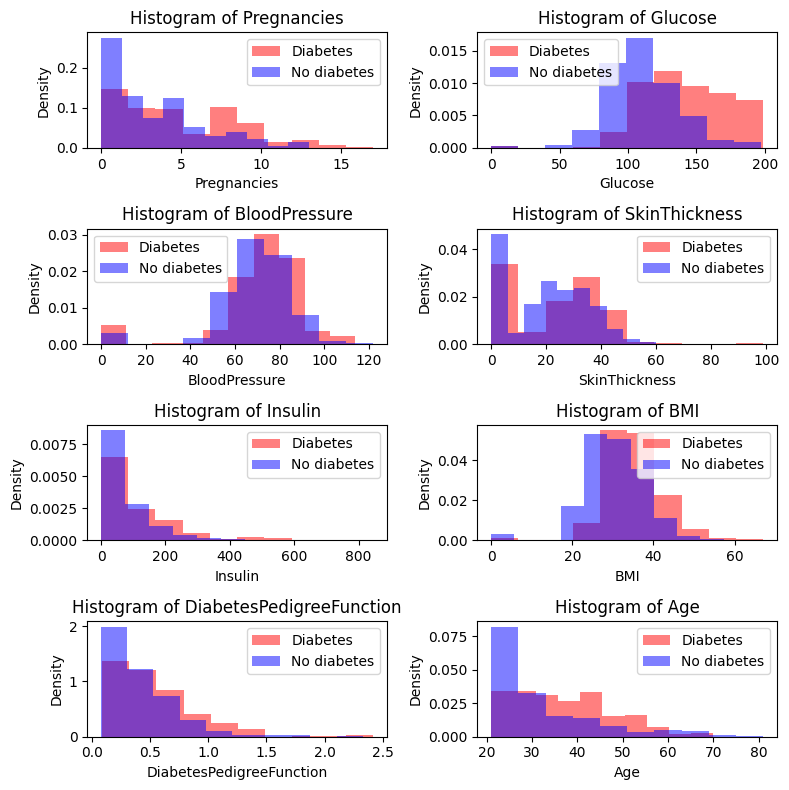

In [10]:
# plot the histohram for different features
fig, axes = plt.subplots(4, 2, figsize=(8, 8))

for i, col in enumerate(columns[:-1]):
    ax = axes[i // 2, i % 2]  # Arrange subplots
    ax.hist(df[df['Outcome'] == 1][col], color='r', label='Diabetes', alpha=0.5, density=True)
    ax.hist(df[df['Outcome'] == 0][col], color='b', label='No diabetes', alpha=0.5, density=True)
    ax.set_title(f"Histogram of {col}")
    ax.set_ylabel("Density")
    ax.set_xlabel(col)
    ax.legend()

plt.tight_layout()
plt.show()


> Conclusion from Data Visualization
>> - The histograms show that the features are largely overlapping between diabetic and non-diabetic individuals.\
>>   This indicates that no single feature directly separates the two groups just by visualization.\
>>  Therefore, we cannot determine the cause of diabetes purely from raw data, and a machine learning model is needed.


### Prepare the data

In [11]:
# Extract features and labels
X = df.iloc[:, :-1].values  # numpy arrays
y = df.iloc[:, -1].values   # numpy arrays

In [12]:
# View X and y
X, y[:10]

(array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
        [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
        [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
        ...,
        [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
        [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
        [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]]),
 array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1]))

In [13]:
# split the data into train, validation and test sets
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=24)

# validation and test
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.50, random_state=24)

### Model

In [14]:
# check the shape
X_train.shape

(537, 8)

In [15]:
# 1. create a model 
model = tf.keras.Sequential([
    tf.keras.Input(shape=(8, )), 
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# 3. fit the data into the model
history = model.fit(x=X_test,
                    y=y_test,
                    epochs=20,
                    validation_data=(X_val, y_val)
                   )

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 220ms/step - accuracy: 0.6292 - loss: 2.1565 - val_accuracy: 0.4914 - val_loss: 2.7235
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.5476 - loss: 1.9314 - val_accuracy: 0.4052 - val_loss: 2.4686
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.3982 - loss: 2.0726 - val_accuracy: 0.3879 - val_loss: 2.2746
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.4646 - loss: 1.7962 - val_accuracy: 0.4569 - val_loss: 2.2217
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.5382 - loss: 1.5731 - val_accuracy: 0.4741 - val_loss: 2.3101
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.5486 - loss: 1.5315 - val_accuracy: 0.4483 - val_loss: 2.1579
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.4889 - loss: 1.5199 - val_accuracy: 0.4397 - val_loss: 2.1198
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.4823 - loss: 1.4180 - val_accuracy: 0.4569 - val_loss: 2.1166

In [16]:
# Evaluate the model
model.evaluate(X_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5789 - loss: 1.1868


[1.0623904466629028, 0.582608699798584]

<Axes: >

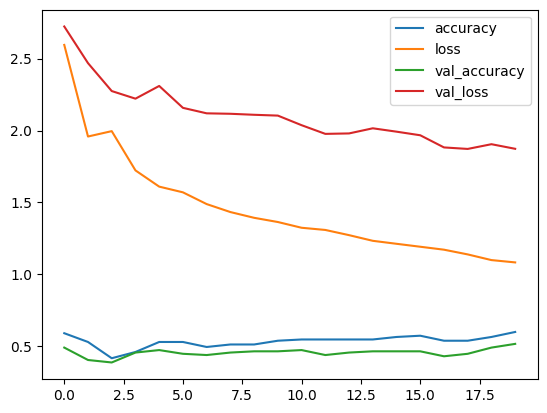

In [17]:
# Plot the accuracy vs plot
pd.DataFrame(history.history).plot()

> Model Performance Analysis
>>The current model achieves an accuracy of **approximately 60%**, which indicates room for improvement. 

### Improving the model
Possible Issues:
- **Feature Scaling:** The features have different scales, which can affect model performance.
- **Class Imbalance:** The dataset has **500 non-diabetic samples** and **268 diabetic samples**, leading to imbalance.

#### Next Steps:
To enhance the model’s performance, we will:
1. **Scale the features** to ensure uniform distribution using `StandardScaler`.
2. **Balance the dataset** to handle class imbalance using the library called `imbalanced-learn`.
3. **Retrain the model** with improved preprocessing steps.

Let's proceed with these improvements! 🚀

In [18]:
# Import the over sampler
from imblearn.over_sampling import RandomOverSampler

# Import the Standard scaler
from sklearn.preprocessing import StandardScaler

In [19]:
# instanciate oversampler
osampler = RandomOverSampler(random_state=24)

# resample X and y
X_res, y_res = osampler.fit_resample(X, y)

# check for distribution
sum(y_res == 1), sum(y_res == 0)

(np.int64(500), np.int64(500))

In [20]:
# Instantiate oversampler
osampler = RandomOverSampler(random_state=24)

# Resample X and y
X_res, y_res = osampler.fit_resample(X, y)

# Check for class distribution after resampling
print(f"Class distribution after resampling: {dict(pd.Series(y_res).value_counts())}")

Class distribution after resampling: {1: np.int64(500), 0: np.int64(500)}


In [26]:
# Instantiate standard scaler
sscaler = StandardScaler()

# Split the resampled data
X_res_train, X_res_temp, y_res_train, y_res_temp = train_test_split(X_res, y_res, test_size=0.30, random_state=24)
X_res_test, X_res_val, y_res_test, y_res_val = train_test_split(X_res_temp, y_res_temp, test_size=0.50, random_state=24)  

# Scale the features
X_res_train_scaled = sscaler.fit_transform(X_res_train)
X_res_test_scaled = sscaler.transform(X_res_test)
X_res_val_scaled = sscaler.transform(X_res_val)

In [27]:
# Lets retrain the model

# 1. create a model
model_2 = tf.keras.Sequential([
    tf.keras.Input(shape=(8, )),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model
model_2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# 3. fit the data into model
history_2 = model_2.fit(
    x=X_res_train_scaled,
    y=y_res_train,
    epochs=20,
    validation_data=(X_res_val_scaled, y_res_val)
)

Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.5601 - loss: 0.7210 - val_accuracy: 0.6400 - val_loss: 0.6382
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6533 - loss: 0.6556 - val_accuracy: 0.6667 - val_loss: 0.6091
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6691 - loss: 0.6222 - val_accuracy: 0.6933 - val_loss: 0.5847
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6573 - loss: 0.6176 - val_accuracy: 0.7333 - val_loss: 0.5632
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6690 - loss: 0.5949 - val_accuracy: 0.7733 - val_loss: 0.5426
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7210 - loss: 0.5551 - val_accuracy: 0.7800 - val_loss: 0.5232
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7045 - loss: 0.5432 - val_accuracy: 0.7800 - val_loss: 0.5096
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7108 - loss: 0.5184 - val_accuracy: 0.7800 - v

In [28]:
# Evaluate the model
model_2.evaluate(X_res_test_scaled, y_res_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7695 - loss: 0.4634


[0.462088406085968, 0.7799999713897705]

In [29]:
# see the previous model's performance
model.evaluate(X_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5789 - loss: 1.1868


[1.0623904466629028, 0.582608699798584]

### Model Performance Improvement

After applying **oversampling** to handle class imbalance and **feature scaling**, the model's accuracy improved by **20%** over the previous version in **20 epochs**.

#### Further Improvements:
To enhance performance even more, we can:
- **Increase the number of epochs** to allow better convergence.
- **Add more layers** to capture complex patterns.
- **Increase units per layer** for higher learning capacity.
- **Modify activation functions** to optimize feature extraction.


#### Plot performance metrics of Model 2
 The history includes both training and validation metrics:
- `accuracy` and `loss` correspond to training performance.
- `val_accuracy` and `val_loss` represent validation performance.

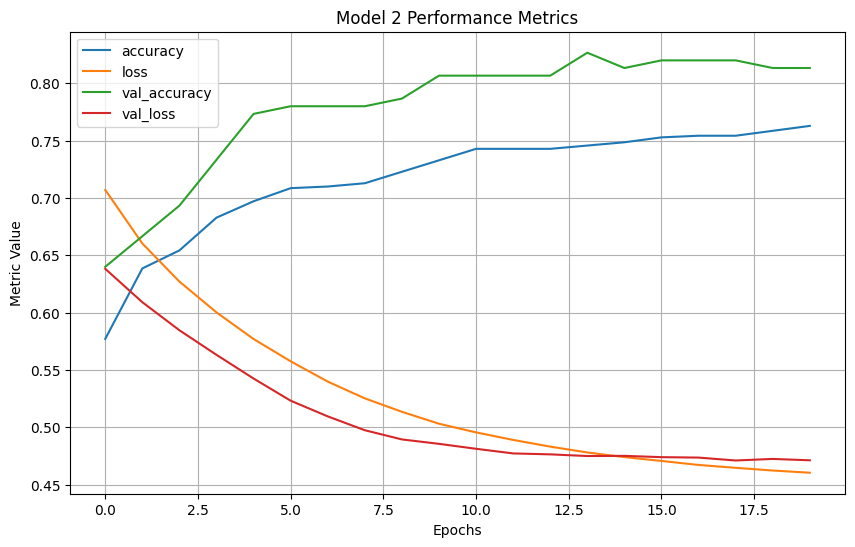

In [33]:
pd.DataFrame(history_2.history).plot(figsize=(10, 6))

plt.title("Model 2 Performance Metrics")
plt.xlabel("Epochs")
plt.ylabel("Metric Value")
plt.legend(loc="best")
plt.grid()
plt.show()